<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_z_time_series_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중변수를 사용해야 하는 경우
- 공기 오염 데이터 (베이징의 미국 대사관 측정: 5년간 시간단위 측정)

No: row number  
year: year of data in this row  
month: month of data in this row  
day: day of data in this row  
hour: hour of data in this row  
pm2.5: PM2.5 concentration 
DEWP: Dew Point  
TEMP: Temperature   
PRES: Pressure  
cbwd: Combined wind direction  
Iws: Cumulated wind speed  
Is: Cumulated hours of snow  
Ir: Cumulated hours of rain  

In [3]:
# 데이터

!wget https://bit.ly/2PtuGMO -O raw.csv

--2019-03-17 10:34:46--  https://bit.ly/2PtuGMO
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv [following]
--2019-03-17 10:34:46--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010492 (1.9M) [text/plain]
Saving to: ‘raw.csv’

raw.csv             100%[===================>]   1.92M  --.-KB/s    in 0.1s    

2019-03-17 10:34:46 (19.3 MB/s) - ‘raw.csv’ saved [2010492/2010492]



In [0]:
from sklearn.preprocessing import  MinMaxScaler
import pandas as pd

In [5]:
from sklearn.preprocessing import LabelEncoder
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset[:20]

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,6,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,7,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,8,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,9,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [6]:
# 24 시간 후의 데이터 사용
dataset.drop('No', axis=1, inplace=True)
# 컬럼 선택]
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# 결축치는 0으로
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]
print(dataset.head(5))
# 파일로 저장
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


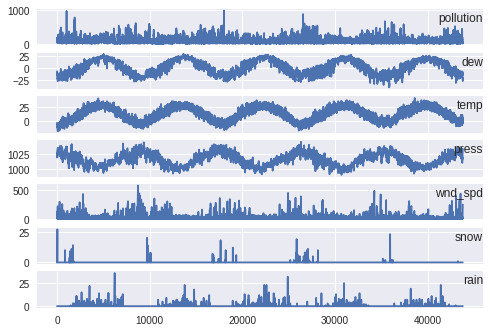

In [7]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

## LSTM 용으로 데이터 준비
- 정규화
- 지도학습: 과거 24시간 데이터로 한 시간 후를 예측
- 풍속은 카테고리 변수로, 나머지는 정규화
- LSTM용 3D 포맷으로  [samples, timesteps, features]

In [18]:
# 시리즈 데이터를 지도학습용 데이터로 변환
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  


In [48]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


- 50 뉴런, 1 스텝,  8 특성
- MAE(손실함수), Adam (알고리즘)
- 배치크기 72 (3일), 이포크 50

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 2s - loss: 0.0606 - val_loss: 0.0484
Epoch 2/50
 - 1s - loss: 0.0409 - val_loss: 0.0432
Epoch 3/50
 - 1s - loss: 0.0227 - val_loss: 0.0316
Epoch 4/50
 - 1s - loss: 0.0166 - val_loss: 0.0247
Epoch 5/50
 - 1s - loss: 0.0153 - val_loss: 0.0164
Epoch 6/50
 - 1s - loss: 0.0148 - val_loss: 0.0149
Epoch 7/50
 - 1s - loss: 0.0149 - val_loss: 0.0142
Epoch 8/50
 - 1s - loss: 0.0148 - val_loss: 0.0143
Epoch 9/50
 - 1s - loss: 0.0149 - val_loss: 0.0144
Epoch 10/50
 - 1s - loss: 0.0147 - val_loss: 0.0142
Epoch 11/50
 - 1s - loss: 0.0147 - val_loss: 0.0141
Epoch 12/50
 - 1s - loss: 0.0146 - val_loss: 0.0140
Epoch 13/50
 - 1s - loss: 0.0147 - val_loss: 0.0138
Epoch 14/50
 - 1s - loss: 0.0145 - val_loss: 0.0140
Epoch 15/50
 - 1s - loss: 0.0147 - val_loss: 0.0137
Epoch 16/50
 - 1s - loss: 0.0145 - val_loss: 0.0138
Epoch 17

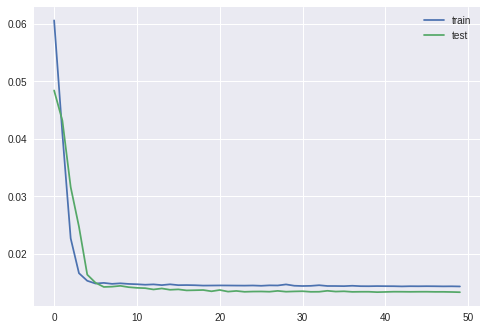

In [24]:
# design network

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error

In [49]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.433
